In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import warnings 
warnings.filterwarnings('ignore')

In [285]:
df = pd.read_csv("austo_automobile.csv")

In [286]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


<font color = "blue">
<font size = 5>
A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [287]:
df.shape

(1581, 14)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


#### There are 1581 rows and 14 columns.

#### There is a total of 13 features with 8 categorical variables and 6 numerical variables

<font color = "blue">
<font size = 5>
B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

## Data Pre-processing

#### The No.of Dependents is a categorical variable so changing its datatype to object.

In [289]:
df["No_of_Dependents"].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [290]:
df["No_of_Dependents"] = df["No_of_Dependents"].astype("object")

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 173.0+ KB


<font color = "blue">
<font size = 3> 
Bad Values and missing Values

In [292]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

#### Gender and Partner salary has missing values

In [293]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


#### There is no Anamolies in age and salary. All are within their range.

In [294]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,5.0,3.0,557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [295]:
df["Gender"].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

#### There are some bad values in gender like Femal, Femle and also some missing values.

In [296]:
df["Profession"].unique()

array(['Business', 'Salaried'], dtype=object)

In [297]:
df["Marital_status"].unique()

array(['Married', 'Single'], dtype=object)

In [298]:
df["Education"].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [299]:
df["Personal_loan"].unique()

array(['No', 'Yes'], dtype=object)

In [300]:
df["House_loan"].unique()

array(['No', 'Yes'], dtype=object)

In [301]:
df["Partner_working"].unique()

array(['Yes', 'No'], dtype=object)

In [302]:
df["Make"].unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

#### All the categorical variables looks good except gender. All the Numerical Variables looks good except Partner Salary.

In [303]:
dups = df.duplicated()
print("Number of duplicate rows =",dups.sum())

Number of duplicate rows = 0


#### there is no duplicates

<font color = "blue">
<font size = 3>
Cleaning Missing and Bad Values

In [304]:
df["Gender"].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [305]:
df["Gender"] = df["Gender"].replace("Femal","Female")
df["Gender"] = df["Gender"].replace("Femle","Female")

In [306]:
df["Gender"].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

#### Both the Bad Values in Gender are fixed.

In [307]:
df["Gender"].isnull().sum()

53

In [308]:
df["Gender"] = df["Gender"].replace(np.nan,df["Gender"].mode()[0])

In [309]:
df["Gender"].isnull().sum()

0

In [310]:
df["Gender"].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

#### Missing values are imputed with the mode as it is an categorical variable.

In [311]:
df["Partner_salary"].describe()

count     1475.000000
mean     20225.559322
std      19573.149277
min          0.000000
25%          0.000000
50%      25600.000000
75%      38300.000000
max      80500.000000
Name: Partner_salary, dtype: float64

#### Partner salary has missing values and have to check non working and working partner before impute values

In [312]:
df[df["Partner_working"]=="Yes"]["Partner_salary"].isnull().sum()

16

In [313]:
df[df["Partner_working"]=="No"]["Partner_salary"].isnull().sum()

90

#### 16 Working partner has missing partner salary and 90 non working partner has missing partner salary.

In [314]:
for i in range(len(df)):
    if(df.loc[i,"Partner_working"]=="No"):
        df.loc[i,"Partner_salary_cleaned"] = 0
    else:
        df.loc[i,"Partner_salary_cleaned"] =  df.loc[i,"Partner_salary"]

In [315]:
df[df["Partner_working"]=="No"]["Partner_salary_cleaned"].isnull().sum()

0

#### The Non working partner salary is sorted.

In [316]:
df["Partner_salary_cleaned"].isnull().sum()

16

In [317]:
y = df[df["Partner_salary"].isnull()][df["Partner_working"]=="Yes"].index

In [318]:
df.iloc[y]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Partner_salary_cleaned
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV,NaN
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV,NaN
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV,NaN
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV,NaN
209,43,Female,Salaried,Married,Graduate,4,Yes,No,Yes,53400,NaN,123900,64000,SUV,NaN
284,41,Female,Business,Married,Post Graduate,2,No,No,Yes,70500,NaN,105800,33000,Sedan,NaN
339,39,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,76800,NaN,115400,50000,Sedan,NaN
376,38,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,79000,NaN,117400,46000,Sedan,NaN
424,37,Female,Salaried,Married,Graduate,2,Yes,Yes,Yes,62000,NaN,100700,46000,Sedan,NaN
444,36,Male,Business,Married,Post Graduate,2,No,No,Yes,72300,NaN,112400,48000,Sedan,NaN


In [319]:
df.loc[43]

Age                                  52
Gender                             Male
Profession                     Salaried
Marital_status                  Married
Education                 Post Graduate
No_of_Dependents                      3
Personal_loan                        No
House_loan                           No
Partner_working                     Yes
Salary                            87600
Partner_salary                      NaN
Total_salary                      88200
Price                             51000
Make                                SUV
Partner_salary_cleaned              NaN
Name: 43, dtype: object

### We can see in missing partner salary rows data, total salary is not the same as salary. As they are not same and partner working is yes, we can calculate the partner salary from that. 
### So we are imputing the partner salary with difference in total salary and salary for those 16 data rows. 
### We can impute with median also but there are only 16 missing values and we have the additional partner salary info in the total salary and dont need to recalculate a total salary.

In [320]:
df["Partner_salary_cleaned"].describe()

count     1565.000000
mean     19062.428115
std      19576.735873
min          0.000000
25%          0.000000
50%      25000.000000
75%      38100.000000
max      80500.000000
Name: Partner_salary_cleaned, dtype: float64

<Axes: xlabel='Partner_salary_cleaned'>

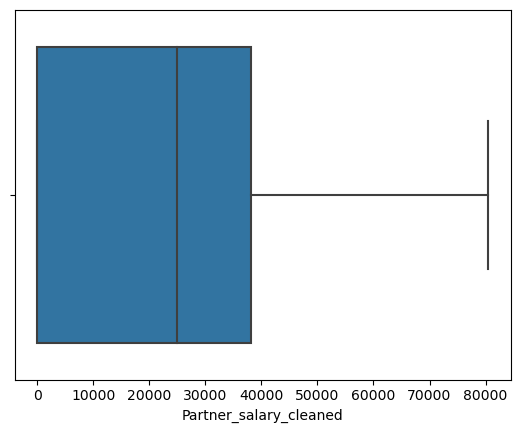

In [321]:
sns.boxplot(x=df["Partner_salary_cleaned"])

In [322]:
for i in y:
    df.loc[i,"Partner_salary_cleaned"] = df.loc[i,"Total_salary"] - df.loc[i,"Salary"]

In [323]:
df.iloc[y]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Partner_salary_cleaned
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV,600.0
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV,80100.0
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV,400.0
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV,70800.0
209,43,Female,Salaried,Married,Graduate,4,Yes,No,Yes,53400,NaN,123900,64000,SUV,70500.0
284,41,Female,Business,Married,Post Graduate,2,No,No,Yes,70500,NaN,105800,33000,Sedan,35300.0
339,39,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,76800,NaN,115400,50000,Sedan,38600.0
376,38,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,79000,NaN,117400,46000,Sedan,38400.0
424,37,Female,Salaried,Married,Graduate,2,Yes,Yes,Yes,62000,NaN,100700,46000,Sedan,38700.0
444,36,Male,Business,Married,Post Graduate,2,No,No,Yes,72300,NaN,112400,48000,Sedan,40100.0


In [324]:
df['Partner_salary_cleaned'].isnull().sum()

0

In [325]:
df["Partner_salary_cleaned"].describe()

count     1581.000000
mean     19233.776091
std      19670.391171
min          0.000000
25%          0.000000
50%      25100.000000
75%      38100.000000
max      80500.000000
Name: Partner_salary_cleaned, dtype: float64

#### The Partner salary is cleaned and looks good

In [326]:
df["Partner_salary"] = df["Partner_salary_cleaned"]
df.drop(["Partner_salary_cleaned"],axis=1,inplace=True)

In [327]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1581,2,Male,1252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,5.0,3.0,557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


#### The Above summary give us the preliminary statistics of the dataset.
#### The dataset is inferred along with plots below.

<font color = "blue">
<font size = 5>
C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

In [328]:
num = df.dtypes[df.dtypes != "object"].index

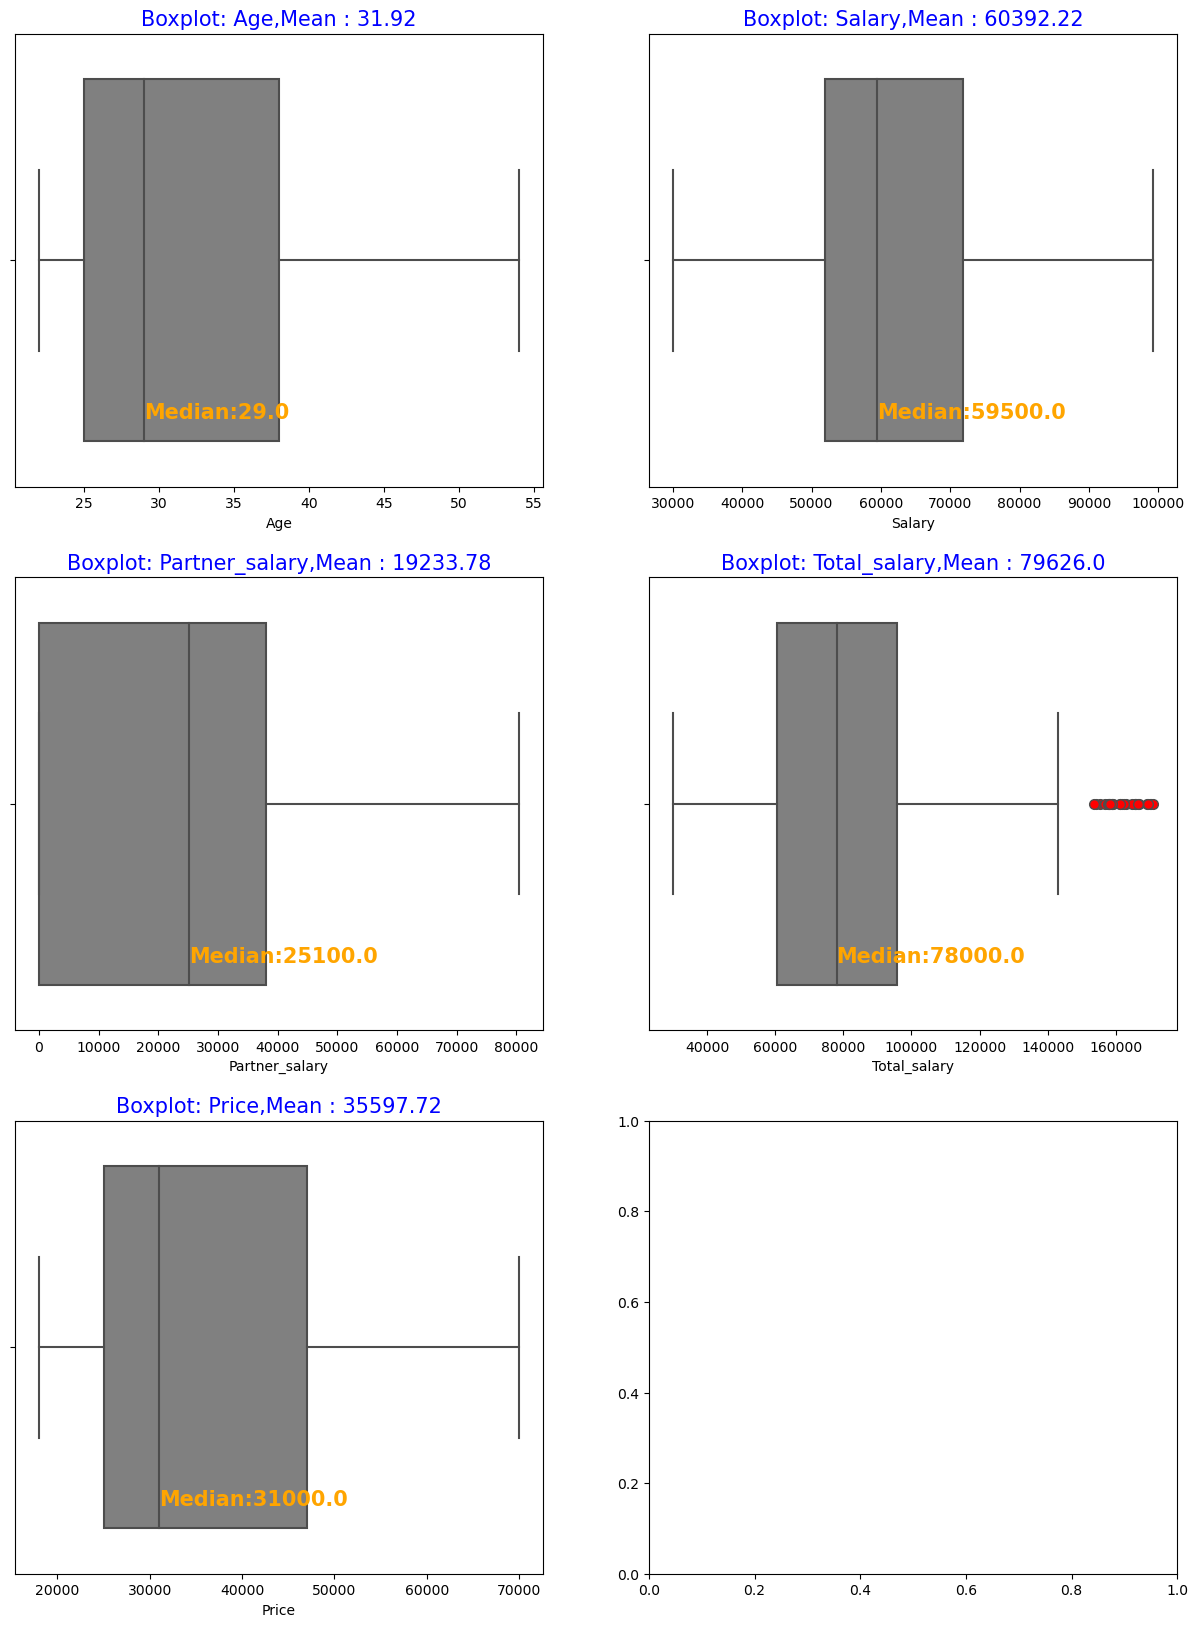

In [329]:
fig,axes = plt.subplots(3,2,figsize=(15,20))
for i,j in zip(num,axes.flatten()):
    sns.boxplot(df,x=i,ax=j,color="Grey",flierprops={"marker":"o", "markersize":"7","markerfacecolor":"red"})
    j.set_title(f"Boxplot: {i},Mean : {round(df[i].mean(),2)}",fontsize=15,color="Blue")
    for p in j.patches:
        j.annotate(text = f"Median:{round(df[i].median(),2)}",xy = (df[i].median(),0.35),fontsize=15,color="Orange",weight='bold')

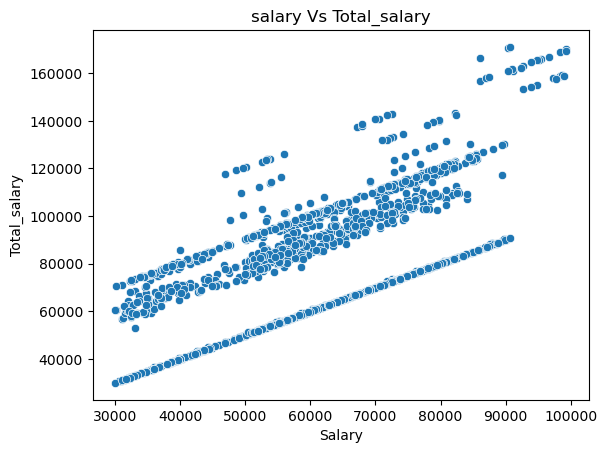

In [330]:
sns.scatterplot(df,x="Salary",y="Total_salary")
plt.title("salary Vs Total_salary");

#### We are not treating the outlier. 
#### Outliers are present in Number of dependents and Total salary. We are not treating the outlier in the data as they seems genuine and within logical range of data.
#### The Total salary can exceed the higher IQR as the sum of the salary are high. As the Salary increases, total salary will also increase.

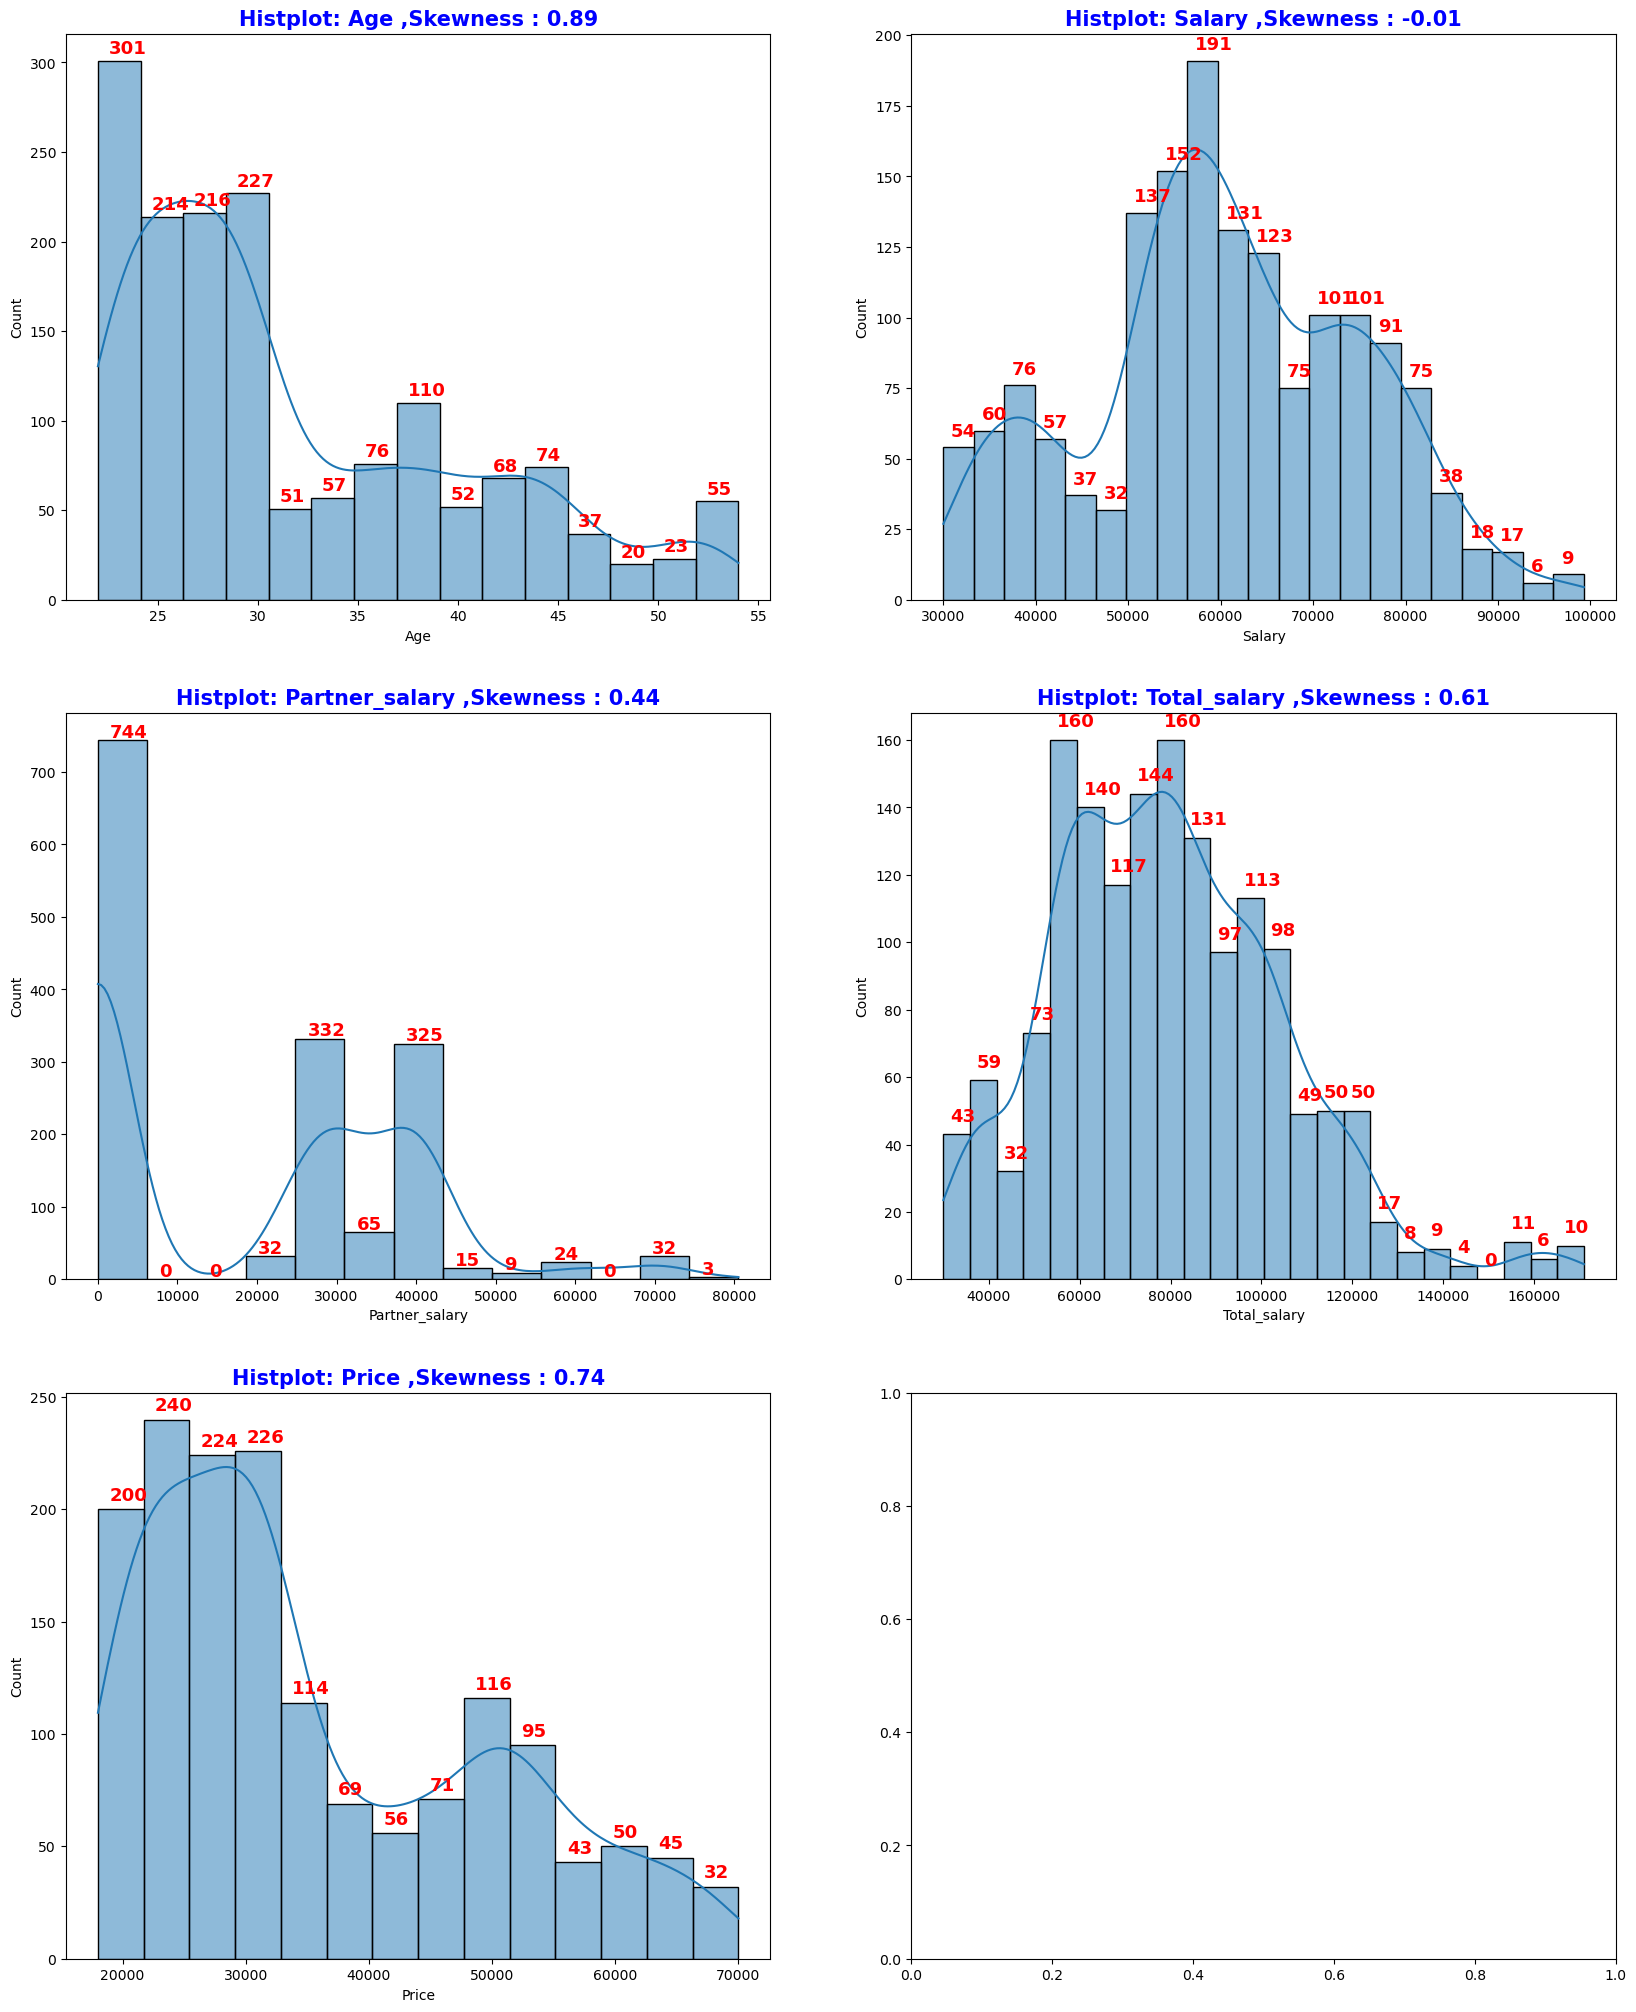

In [331]:
fig,axes = plt.subplots(3,2,figsize=(20,25))
for i,j in zip(num,axes.flatten()):
    sns.histplot(df,x=i,ax=j,kde=True)
    j.set_title(f"Histplot: {i} ,Skewness : {round(df[i].skew(),2)}",fontsize=15,weight='bold',color="Blue")
    for p in j.patches:
        j.annotate(text = f"{p.get_height()}",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=13,color="Red",weight='bold')

### Inference
#### we can see that the Plot 1,3,4 and 5 are Positively skewed. The Histogram and KDE confirms that as it is skewed to the right. The Total Salary is a bit negatively skewed from the normal distribution. we can say it is normally distributed.

In [332]:
df_work = df[df["Partner_working"] == "Yes"]

In [333]:
df_work

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,22,Female,Salaried,Married,Graduate,3,No,No,Yes,34800,28100.0,62900,31000,Hatchback
1537,22,Male,Business,Married,Graduate,3,Yes,Yes,Yes,31300,30900.0,62200,23000,Sedan
1539,22,Male,Salaried,Married,Graduate,2,No,No,Yes,32100,28100.0,60200,27000,Sedan
1546,22,Male,Business,Married,Graduate,3,Yes,No,Yes,32600,26700.0,59300,20000,Hatchback


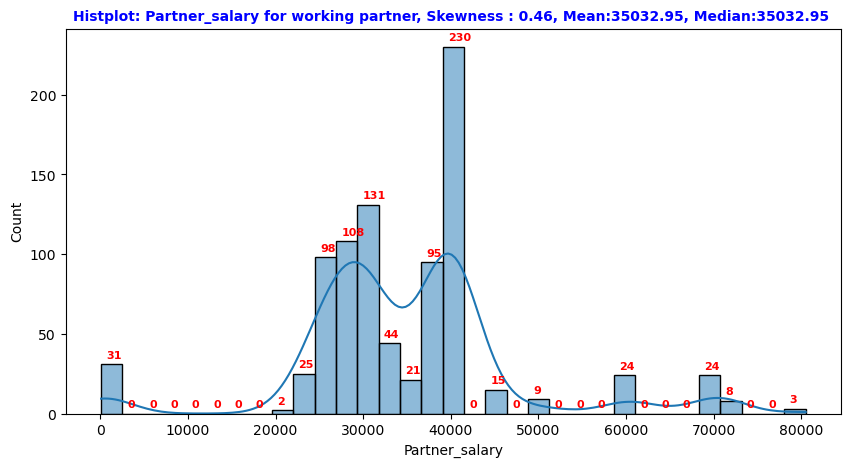

In [334]:
fig,axes = plt.subplots(figsize=(10,5))
skw = round(df_work["Partner_salary"].skew(),2)
mn = round(df_work["Partner_salary"].mean(),2)
md = round(df_work["Partner_salary"].mean(),2)
sns.histplot(df_work,x="Partner_salary",kde=True)
axes.set_title(f"Histplot: Partner_salary for working partner, Skewness : {skw}, Mean:{mn}, Median:{md} ",fontsize=10,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{p.get_height()}",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=8,color="Red",weight='bold')

In [335]:
cat = df.dtypes[df.dtypes == "object"].index

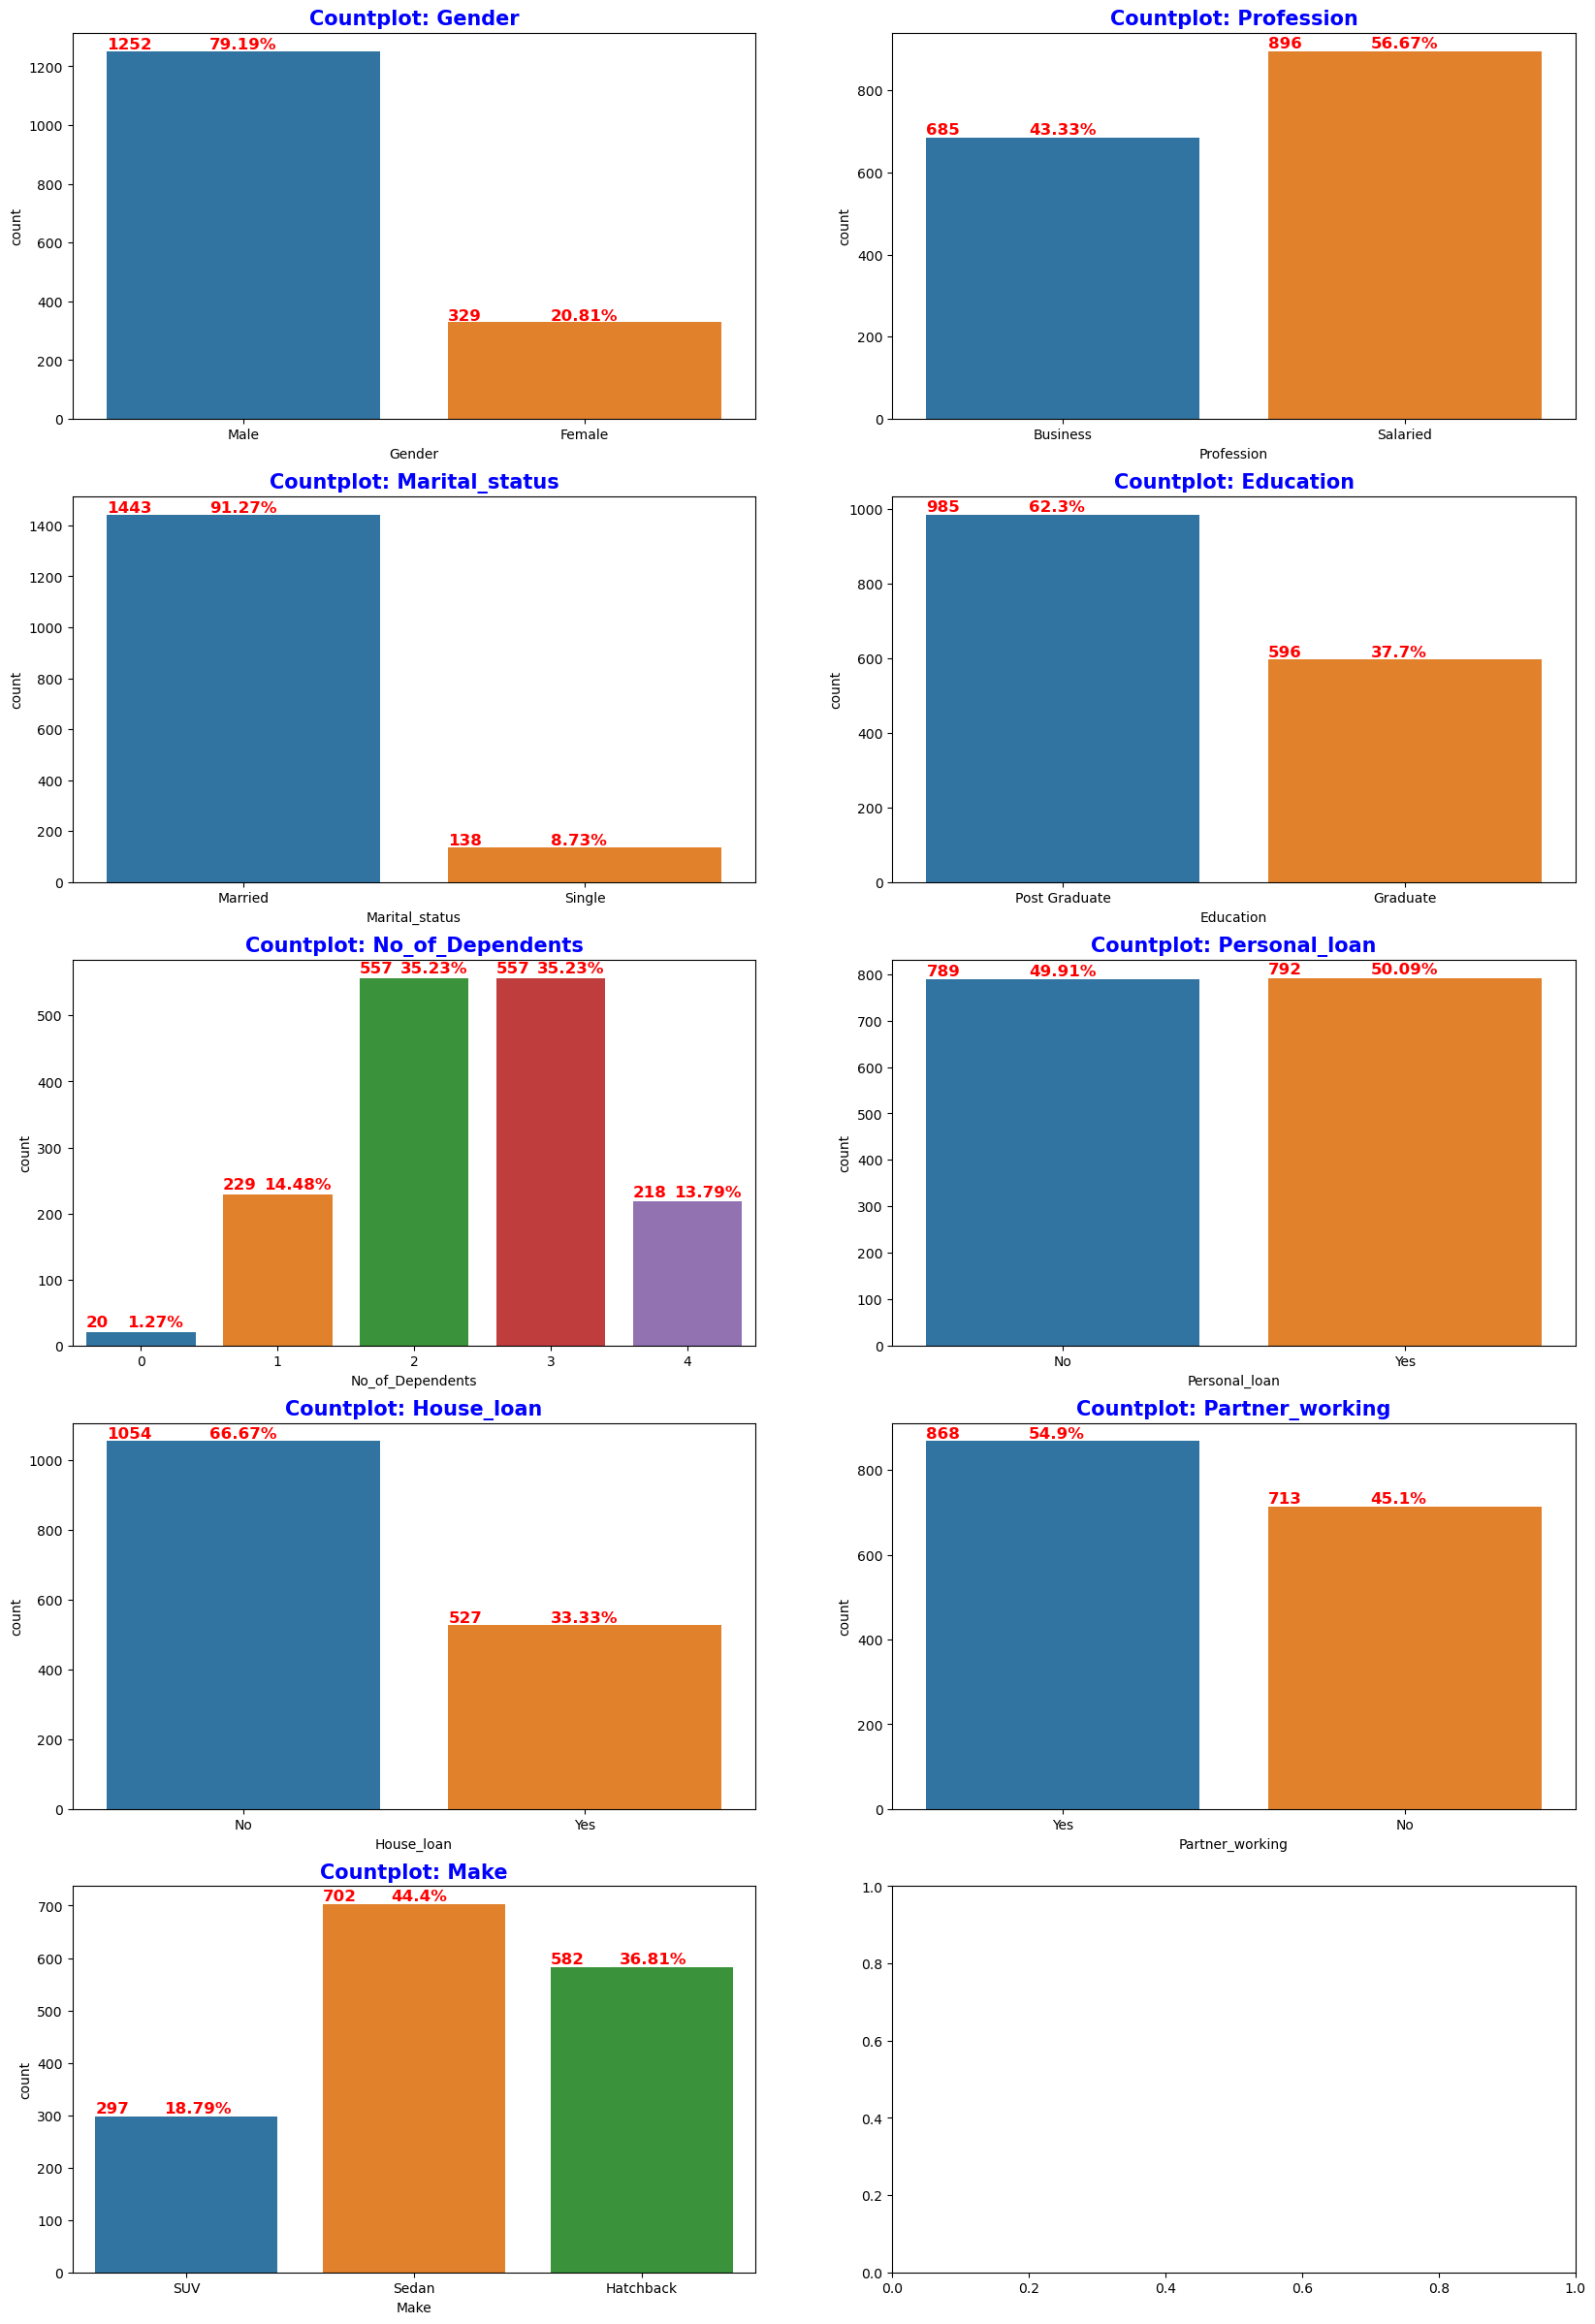

In [336]:
fig,axes = plt.subplots(5,2,figsize=(20,30))
for i,j in zip(cat,axes.flatten()):
    sns.countplot(df,x=i,ax=j)
    j.set_title(f"Countplot: {i}",fontsize=15,weight='bold',color="Blue")
    for p in j.patches:
        j.annotate(text = f"{round(p.get_height())}",xy = (p.get_x(),p.get_height()+8),fontsize=12,weight='bold',color="Red")
        j.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x() + 0.3,p.get_height()+8),fontsize=12,weight='bold',color="Red")

### From the summary of the data, Histogram and Countplot. We can infer that,
#### Most of the customers who bought the car are in the age category of 22 to 38.
#### Male buyers are high compared to the female customers. 79% of the buyers are male.
#### 57% of the buyers have profession as salaried.
#### 70% of the customer has 2 to 3 dependants.
#### Most of them are buying the car priced at 18000 to 47000 dollars.
#### If we see the Total salary alone, the salary of most customer is between 60000 to 100000 dollars. 90% of the customer total salary is under 112600 dollars. The remaining 10% of the customers can be segmented as premium customers.
#### Only 54% of the customers partners are working. Most of the working partner salary is between 22000 to 40000 dollars.
#### Most of buyers are having personal and housing loan. Maybe they bought the car through EMI.Less Interest rate EMI offer can boost the sales.
#### 44% of the customers prefers sedan. Eventhough SUV has an capacity of 7-9. Only 18% prefer them. everyone prefers sedan. In the multivariate analysis we can see why they prefer. It may be due to cost of the car.

<font color = "blue">
<font size = 5>
D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

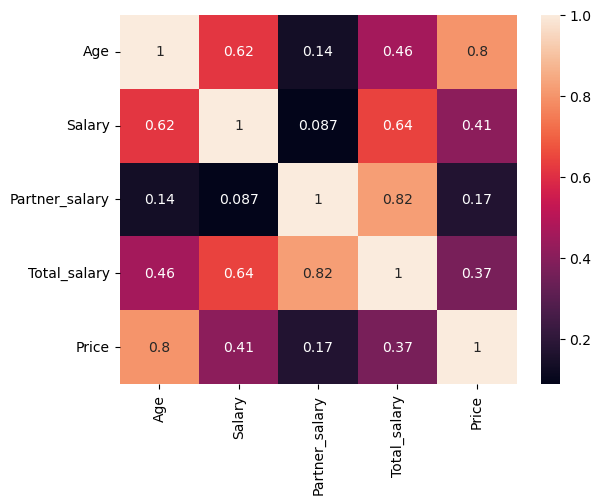

In [337]:
sns.heatmap(df.corr(),annot=True);

#### The Strongest correlation is between Age and Salary. As age increases salary also increase which increases the total salary.

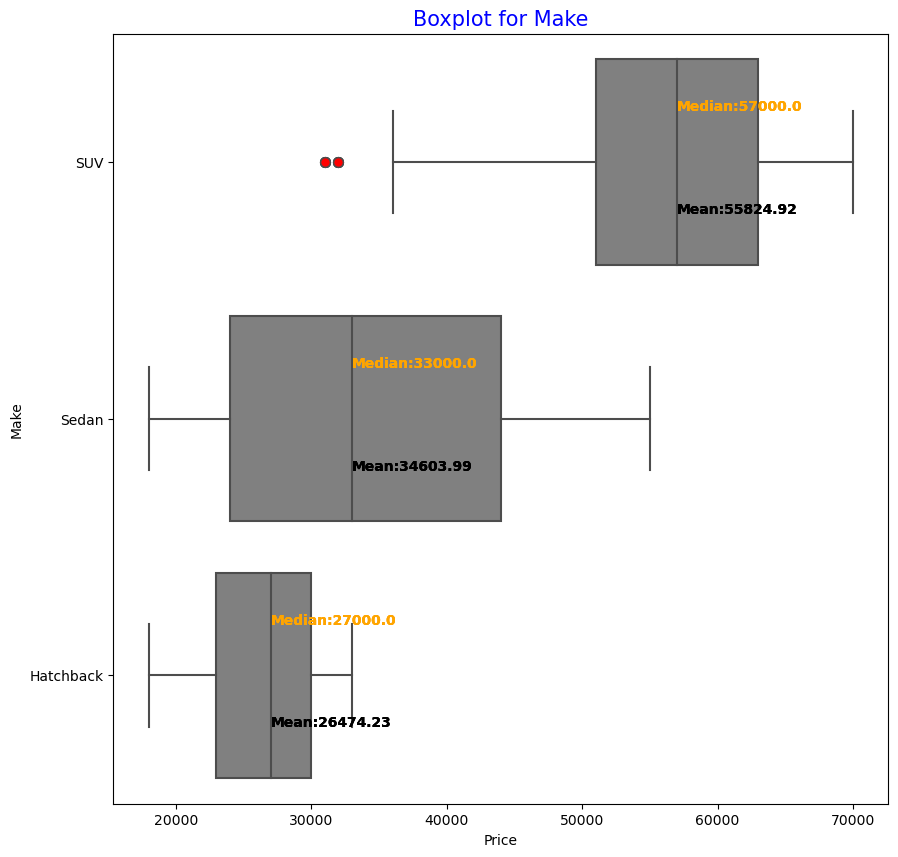

In [338]:
fig,axes = plt.subplots(figsize=(10,10))
suv_m = round(df[df["Make"]=="SUV"]["Price"].median(),2)
hat_m = round(df[df["Make"]=="Hatchback"]["Price"].median(),2)
sed_m = round(df[df["Make"]=="Sedan"]["Price"].median(),2)
suv_m1 = round(df[df["Make"]=="SUV"]["Price"].mean(),2)
hat_m1 = round(df[df["Make"]=="Hatchback"]["Price"].mean(),2)
sed_m1 = round(df[df["Make"]=="Sedan"]["Price"].mean(),2)
sns.boxplot(df,x="Price",color="Grey",flierprops={"marker":"o", "markersize":"7","markerfacecolor":"red"},y="Make")
axes.set_title("Boxplot for Make",fontsize=15,color="Blue")
for p in axes.patches:
    axes.annotate(text = f"Median:{suv_m}",xy = (suv_m,-0.2),fontsize=10,color="Orange",weight='bold')
    axes.annotate(text = f"Median:{hat_m}",xy = (hat_m,1.8),fontsize=10,color="Orange",weight='bold')
    axes.annotate(text = f"Median:{sed_m}",xy = (sed_m,0.8),fontsize=10,color="Orange",weight='bold')
    axes.annotate(text = f"Mean:{suv_m1}",xy = (suv_m,0.2),fontsize=10,color="black",weight='bold')
    axes.annotate(text = f"Mean:{hat_m1}",xy = (hat_m,2.2),fontsize=10,color="black",weight='bold')
    axes.annotate(text = f"Mean:{sed_m1}",xy = (sed_m,1.2),fontsize=10,color="black",weight='bold')

### The Mean Price of the car that has been sold per make is 
#### Hatch is 26474 dollars 
#### Sedan is 34603 dollars
#### SUV is 55824 dollars

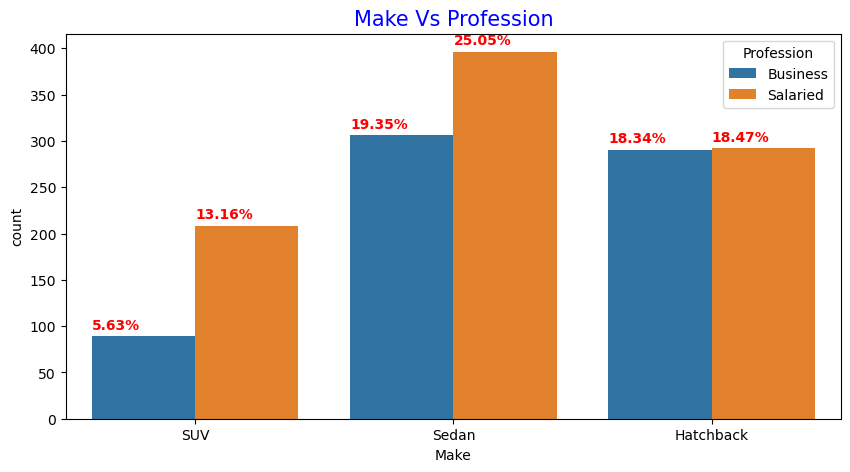

In [339]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Make",hue="Profession")
axes.set_title("Make Vs Profession",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

#### Salaried People customers prefer Sedan and SUV over Business customers. 
#### Hatchback are preferred nearly the same in both business and salaried professionals. Hatchback mean price is less so it is preferred in both professional.  It can be categorised as affordable car.
#### The Most preferred car is sedan, in that mostly Salaried people prefer it than business professional.
#### SUV are mostly bought by Salaried people.

In [340]:
pd.pivot_table(df,index="Make",values="Price",aggfunc=[np.min,np.max])

,amin,amax
,Price,Price
Make,,
Hatchback,18000,33000
SUV,31000,70000
Sedan,18000,55000


#### Based on the High and low priced model for each cars category to say that sedan is both affordable and a bit of luxury car. We dont have the further information about the model of the car so we cant infer about which model is preferred.

In [341]:
for i in range(len(df)):
    if ((df.loc[i,"House_loan"] == "Yes") | (df.loc[i,"Personal_loan"] == "Yes")):
        df.loc[i,"Loan"] = "Yes"
    else:
        df.loc[i,"Loan"] = "No"

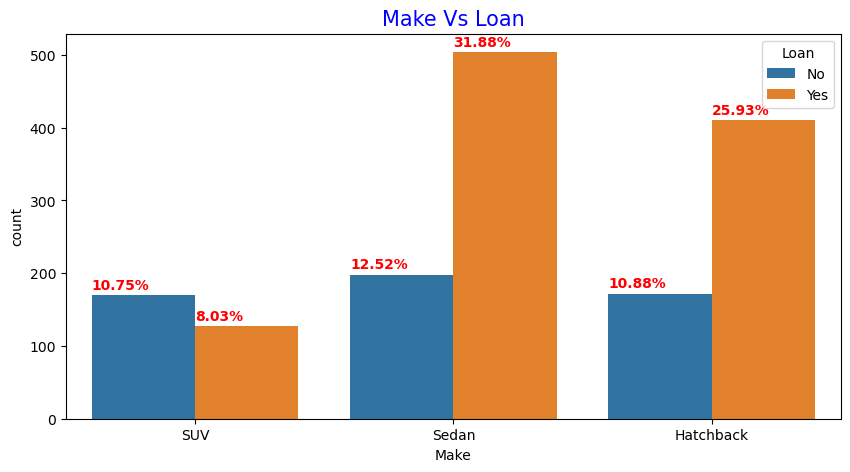

In [342]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Make",hue="Loan")
axes.set_title("Make Vs Loan",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

#### SUV is mostly bought by customers who doesnt have any loan. For the Other two, sedan and hatchback as they are less priced it is bought by customers who have loans. As we dont have much info on loans, we dont know whether they took personal loan for buying car or not.

In [343]:
pd.pivot_table(df,index="Make",columns="Loan",values="Price",aggfunc=np.mean)

Loan,No,Yes
Make,,
Hatchback,26546.511628,26443.902439
SUV,58405.882353,52370.078740
Sedan,33974.747475,34851.190476


In [344]:
round(pd.pivot_table(df,index="Make",columns=["Personal_loan","House_loan"],values="Price",aggfunc=np.size)/(len(df))*100,2)

Personal_loan     No          Yes      
House_loan        No   Yes     No   Yes
Make                                   
Hatchback      10.88  7.53  11.07  7.34
SUV            10.75  0.70   6.64  0.70
Sedan          12.52  7.53  14.80  9.55

In [345]:
pd.pivot_table(df,index="Make",columns=["Personal_loan","House_loan"],values="Price",aggfunc=np.mean)

Personal_loan            No                         Yes              
House_loan               No           Yes            No           Yes
Make                                                                 
Hatchback      26546.511628  26882.352941  26017.142857  26637.931034
SUV            58405.882353  40363.636364  54419.047619  44818.181818
Sedan          33974.747475  34663.865546  35277.777778  34337.748344

#### There is no difference in mean prices of the car among the customers having loan. Having loans doesnt affect the price of the car they are purchasing.

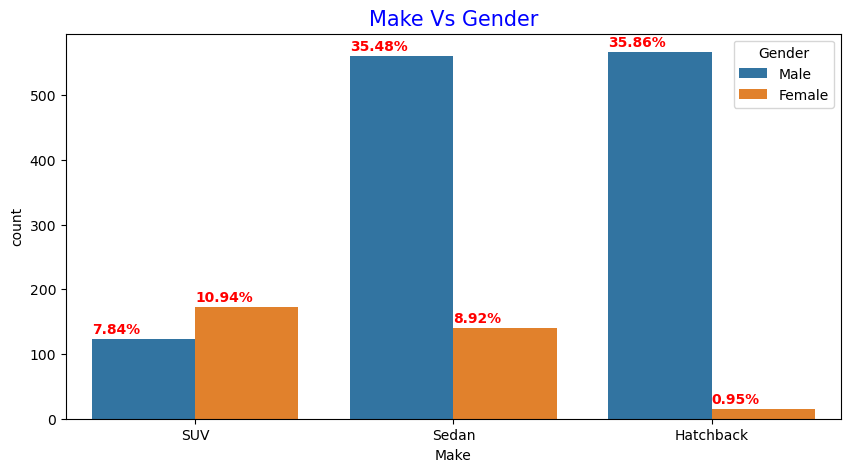

In [346]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Make",hue="Gender")
axes.set_title("Make Vs Gender",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

In [347]:
df["Gender"].value_counts(normalize=True)

Male      0.791904
Female    0.208096
Name: Gender, dtype: float64

#### Only 20% of our customer base is Female. We can say that men prefer car more than women.
#### Female prefer SUV than Men in the SUV segment.

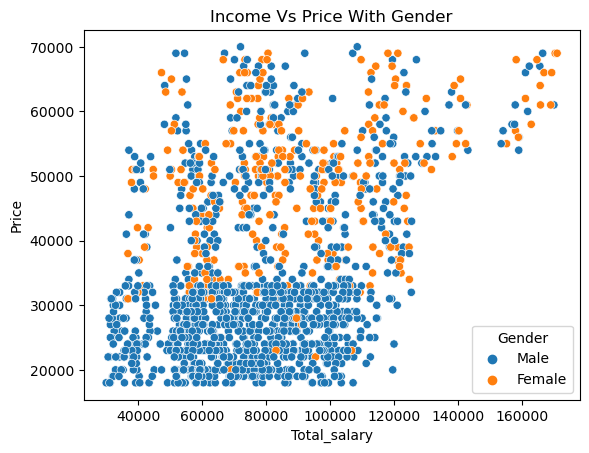

In [348]:
sns.scatterplot(df,x="Total_salary",y="Price",hue="Gender")
plt.title("Income Vs Price With Gender");

####  Male customers are huge in the segment of car price less than 35000 dollars. Eventhough we only have 20% of Female customers, we can see that female customers are preferring high priced.

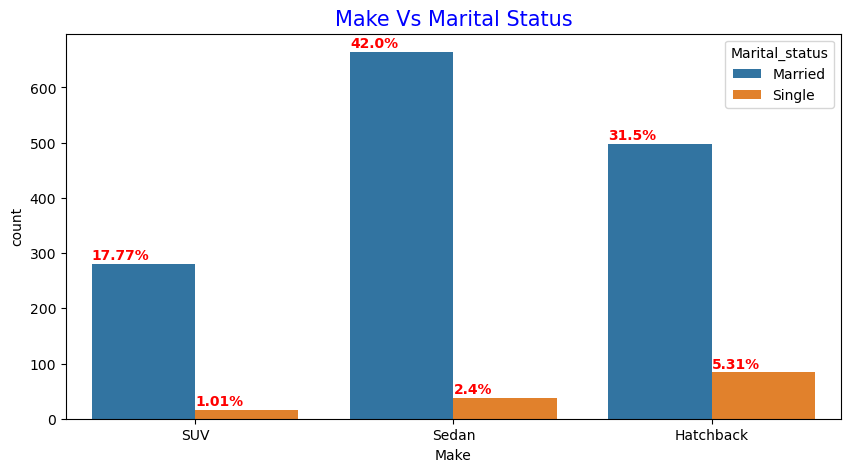

In [349]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Make",hue="Marital_status")
axes.set_title("Make Vs Marital Status",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

#### Marital Status plays an role in purchasing behaviour of the customers. 90% of the customers are married. People buy car as the family expands.

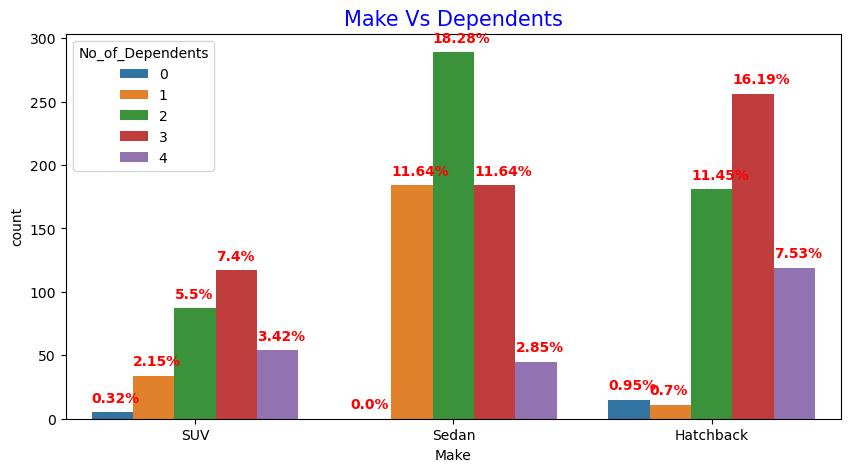

In [350]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Make",hue="No_of_Dependents")
axes.set_title("Make Vs Dependents",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

#### The No. of dependents also has an effect in the car purchase. Customers having more than 2 dependents buys the car and Sedan is mostly preferred by customers having 2 dependents and hatchback and SUV is mostly preferred by customers having 3 dependents.

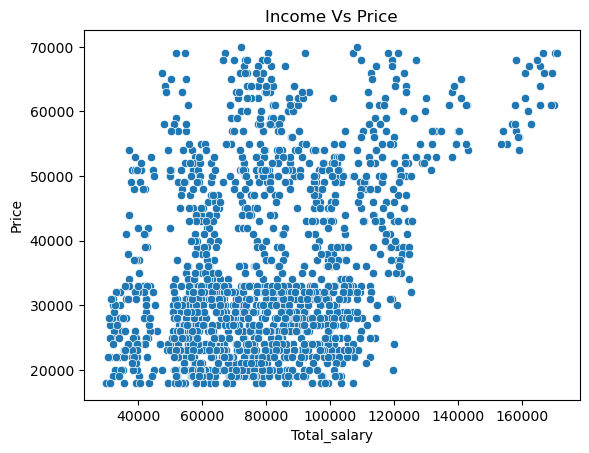

In [351]:
sns.scatterplot(df,x="Total_salary",y="Price")
plt.title("Income Vs Price");

#### Customers who have a total salary less than 100000 dollars prefer cars priced in the range less than 32000 dollars. High earning customers doesnt prefer the low cost cars which can be seen in the plot.

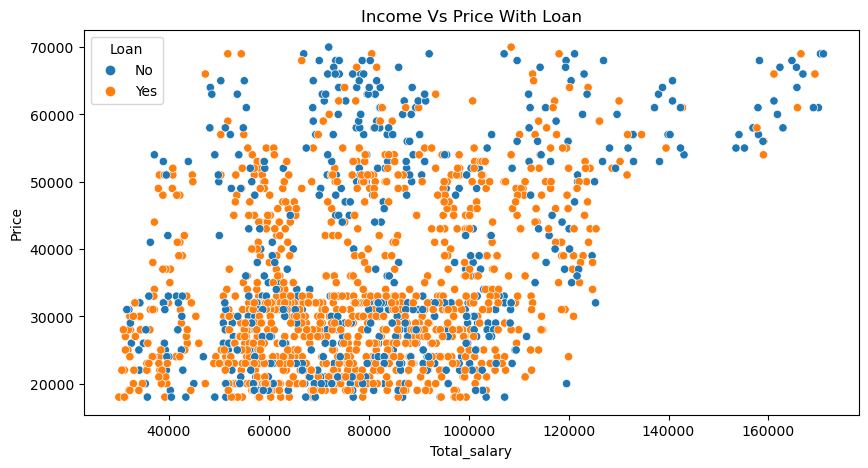

In [352]:
fig,axes = plt.subplots(figsize=(10,5))
sns.scatterplot(df,x="Total_salary",y="Price",hue="Loan")
plt.title("Income Vs Price With Loan");

In [353]:
df[df["Total_salary"]>=140000]["Loan"].value_counts(normalize=True)

No     0.764706
Yes    0.235294
Name: Loan, dtype: float64

#### Most of our customer base has atleast one loan. The inference we can make is that High earning customers doesnt have any loans majorly. Having doesnt have any influence over the purchasing of the car.

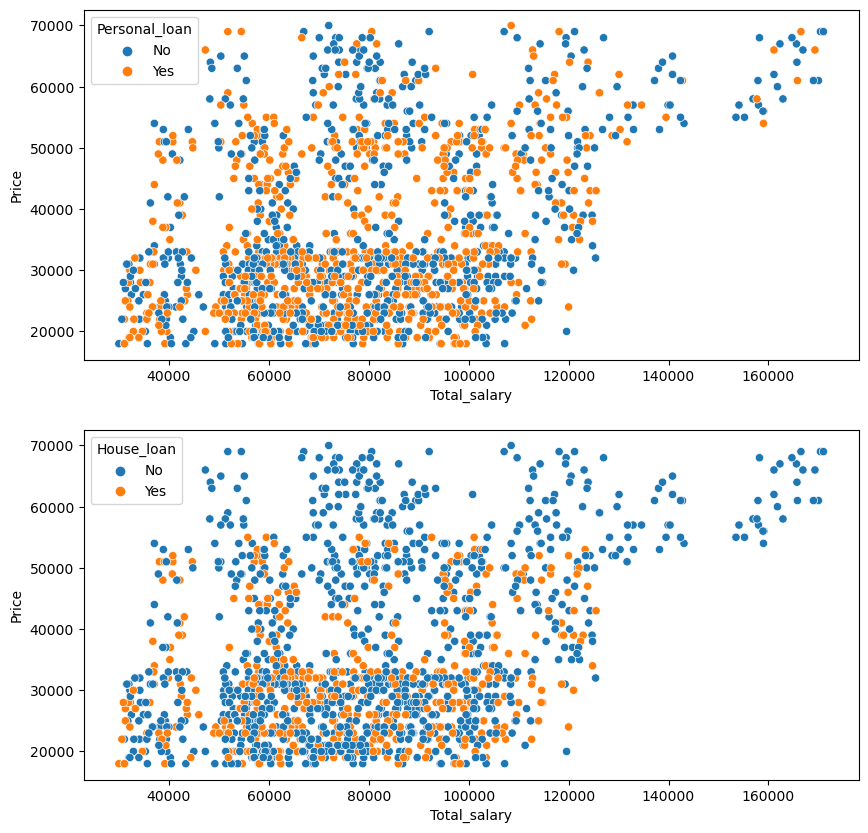

In [354]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
sns.scatterplot(df,x="Total_salary",y="Price",hue="Personal_loan",ax=axes[0])
sns.scatterplot(df,x="Total_salary",y="Price",hue="House_loan",ax=axes[1]);

#### customers having housing loan are not buying cars above 56000 dollars. customers having personal loan doesnt have any behaviour in the price of cars they are purchasing. Maybe they bought the car with personal loan. we dont have that much information on loans.

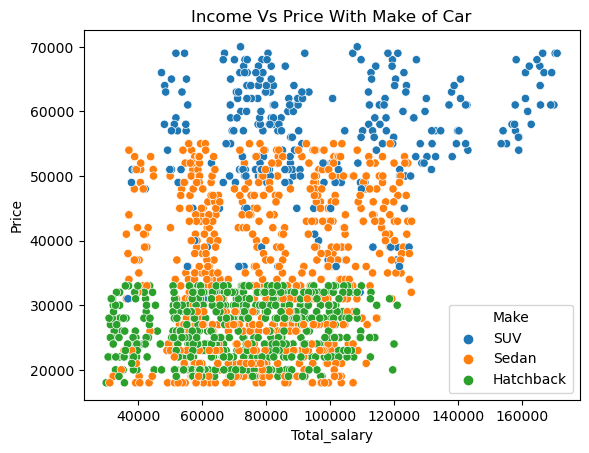

In [355]:
sns.scatterplot(df,x="Total_salary",y="Price",hue="Make")
plt.title("Income Vs Price With Make of Car");

#### Customers who earns more than 130000 dollars only prefers SUV. They dont prefer any other option. They are luxury car buyers so prefers high end priced cars.
#### Some low priced SUV are preferred by customers who earns less.
#### Customers earning less than 120000 dollars are prefering hatchback.
#### Most of the customers preferring sedan and SUV have total salary less than the car price. 
#### If we analyze into this, we can get a clear picture about the buying capacity and whether they will opt for EMI and loan while purchasing.

In [356]:
for i in range(len(df)):
    if ((df.loc[i,"Total_salary"]-df.loc[i,"Price"])>=0):
        df.loc[i,"Purchasing_Capacity"] = "Yes"
    else:
        df.loc[i,"Purchasing_Capacity"] = "No"

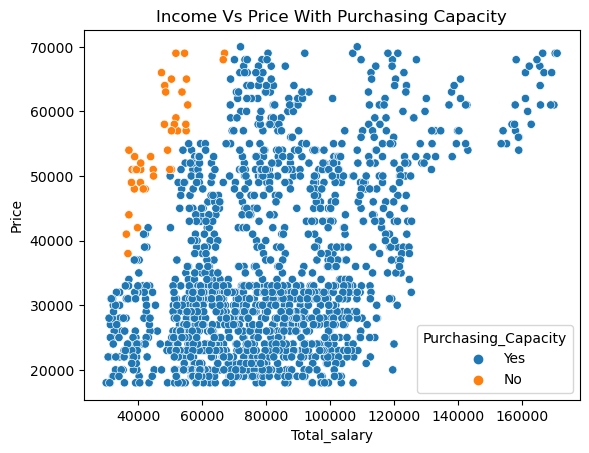

In [357]:
sns.scatterplot(df,x="Total_salary",y="Price",hue="Purchasing_Capacity")
plt.title("Income Vs Price With Purchasing Capacity");

In [358]:
df["Purchasing_Capacity"].value_counts(normalize=True)

Yes    0.974067
No     0.025933
Name: Purchasing_Capacity, dtype: float64

#### They is a very few customers who are buying car priced at more than they earn. And also the customers are having either one loan. So they would take loan or EMI.
#### After paying the interest for those loan, purchasing capacity can be changed and it cant be concluded that all are buying within their purchasing capacity.
#### It is good to offer low cost EMIs or Loans.

<font color = "blue">
<font size = 5>
E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

#### Men prefer cars by large in margin. we only have 20% of the customers that are female. But in SUV segment Women prefer SUV than men.

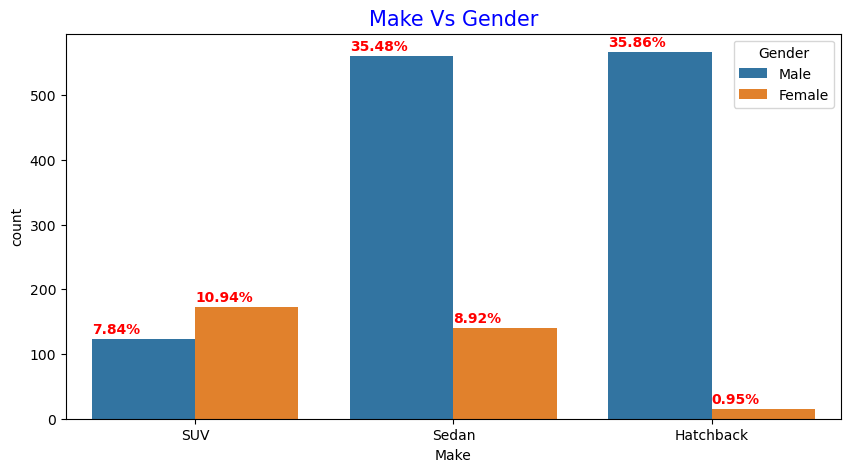

In [359]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Make",hue="Gender")
axes.set_title("Make Vs Gender",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

#### Ned Stark believes that a salaried person is more likely to buy a Sedan. This is agreeable as we can clearly see from the chart. salaried person prefer to buy sedan

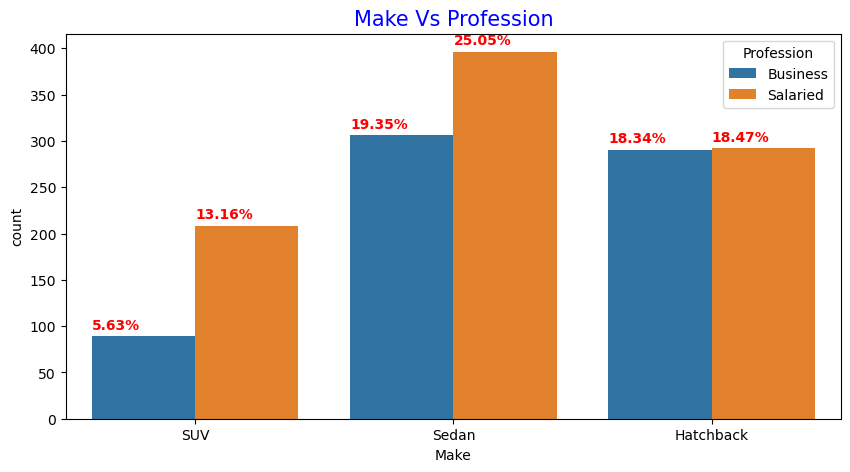

In [360]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Make",hue="Profession")
axes.set_title("Make Vs Profession",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

In [361]:
round(pd.pivot_table(df,index="Make",columns=["Gender","Profession"],values="Price",aggfunc=np.size)/len(df)*100,2).fillna(0)

Gender       Female              Male         
Profession Business Salaried Business Salaried
Make                                          
Hatchback      0.00     0.95    18.34    17.52
SUV            3.48     7.46     2.15     5.69
Sedan          3.16     5.76    16.19    19.29

#### Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.
#### The claim by Sheldon cooper is wrong, only 6% of customers buying SUV are salaried while 19% of the salaried male are buying sedan.
#### The opposite of his statement is correct - a salaried female is an easier target for a SUV sale over a Sedan Sale. As we saw female prefer SUV.

<font color = "blue">
<font size = 5>
F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

F2) Personal_loan

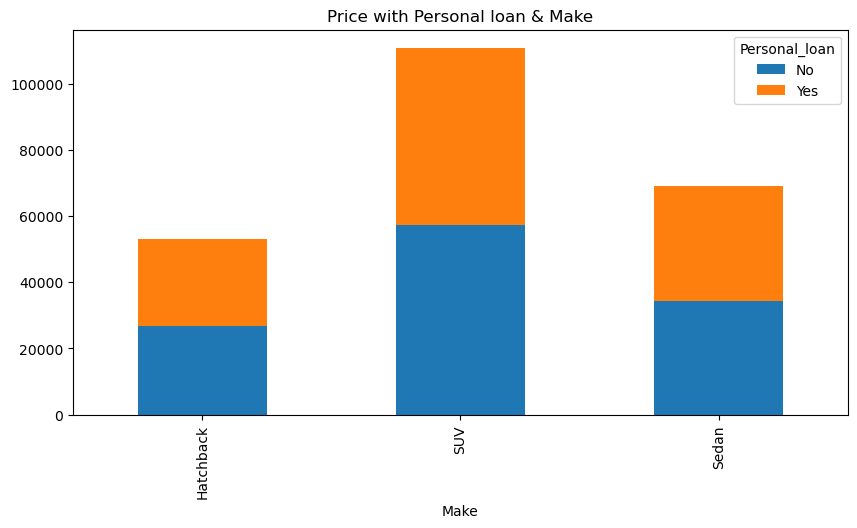

In [362]:
x=pd.pivot_table(df,index="Make",columns="Personal_loan",values="Price",aggfunc=np.mean).fillna(0)
x.plot(kind="bar",stacked=True,figsize=(10,5),title="Price with Personal loan & Make");

In [363]:
pd.pivot_table(df,index="Make",columns="Personal_loan",values="Price",aggfunc=[np.mean,np.size])

mean               size     
Personal_loan            No           Yes   No  Yes
Make                                               
Hatchback      26683.848797  26264.604811  291  291
SUV            57309.392265  53508.620690  181  116
Sedan          34233.438486  34909.090909  317  385

#### Price of the car purchased is not influenced by personal loan. But Customers without personal loan buys SUV mostly.

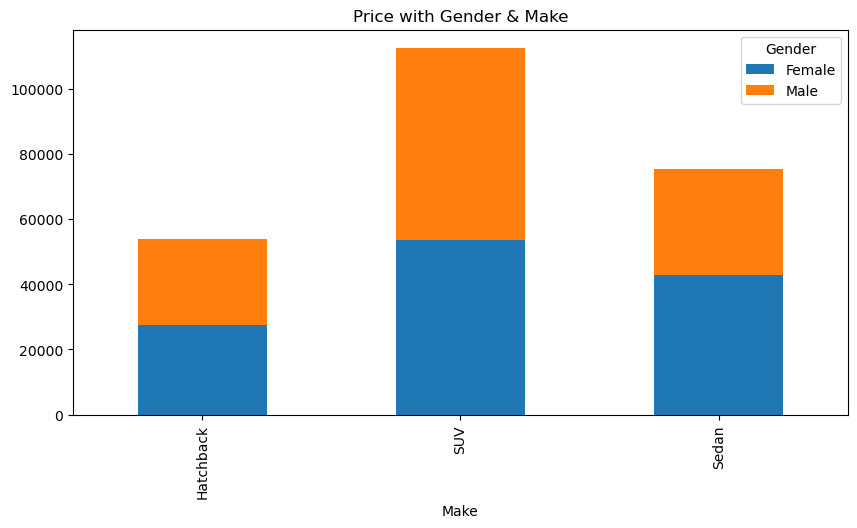

In [364]:
x=pd.pivot_table(df,index="Make",columns="Gender",values="Price",aggfunc=np.mean).fillna(0)
x.plot(kind="bar",stacked=True,figsize=(10,5),title="Price with Gender & Make");

In [365]:
pd.pivot_table(df,index="Make",columns="Gender",values="Price",aggfunc=[np.mean,np.size])

mean                 size     
Gender           Female          Male Female Male
Make                                             
Hatchback  27466.666667  26447.971781     15  567
SUV        53479.768786  59096.774194    173  124
Sedan      42773.049645  32550.802139    141  561

#### Price of the car purchased is not influenced by personal loan or gender. It is influenced by the total earning of the customer.

<font color = "blue">
<font size = 5>
G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

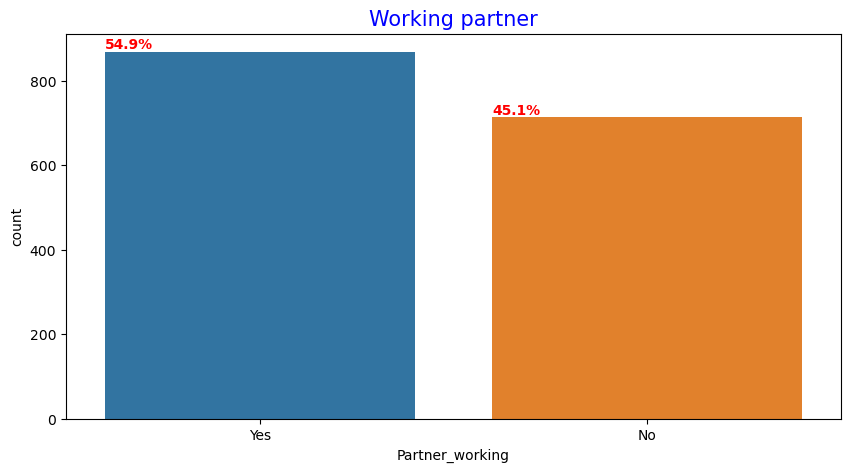

In [366]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Partner_working")
axes.set_title("Working partner",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

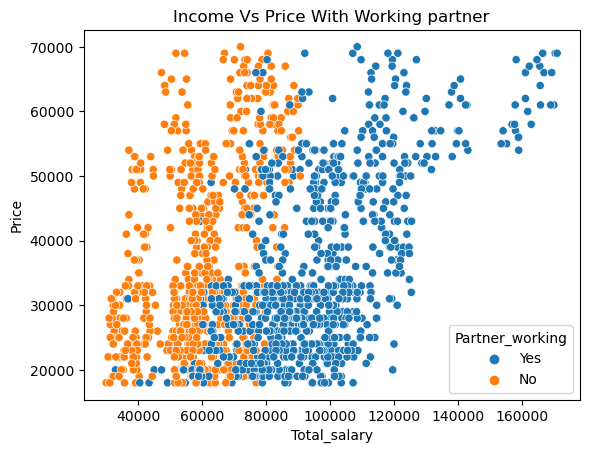

In [367]:
sns.scatterplot(df,x="Total_salary",y="Price",hue="Partner_working")
plt.title("Income Vs Price With Working partner");

In [368]:
df[df["Price"]>=50000]["Partner_working"].value_counts(normalize=True)

Yes    0.526946
No     0.473054
Name: Partner_working, dtype: float64

In [369]:
pd.pivot_table(df[df["Price"]>=50000],index="Partner_working",values="Price",aggfunc=np.mean)

,Price
Partner_working,
No,57474.683544
Yes,57073.863636


#### working partner doesnt has any influence on the purchasing of the high priced car. 47% of the customers who are high priced buying car doesnt have working partner. Mean Price of the car purchased for both segment is more or less the same.

<font color = "blue">
<font size = 5>
H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [370]:
round(pd.pivot_table(df,index="Gender",columns="Marital_status",values="Price",aggfunc=np.size)/len(df)*100,2)

Marital_status,Married,Single
Gender,,
Female,19.42,1.39
Male,71.85,7.34


#### 71% of the Customer are married male.

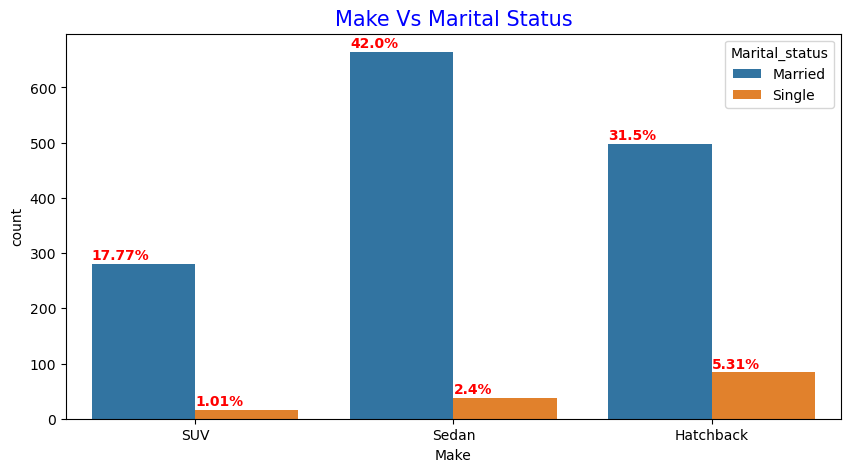

In [371]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Make",hue="Marital_status")
axes.set_title("Make Vs Marital Status",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

In [372]:
df[df["Marital_status"]=="Single"]["No_of_Dependents"].value_counts()

2    104
0     20
1     14
Name: No_of_Dependents, dtype: int64

#### Most of our customer are married. The Single customer category will be potential buyer for Hatchback as it is affordable and they have mostly 1 or 2 dependents.

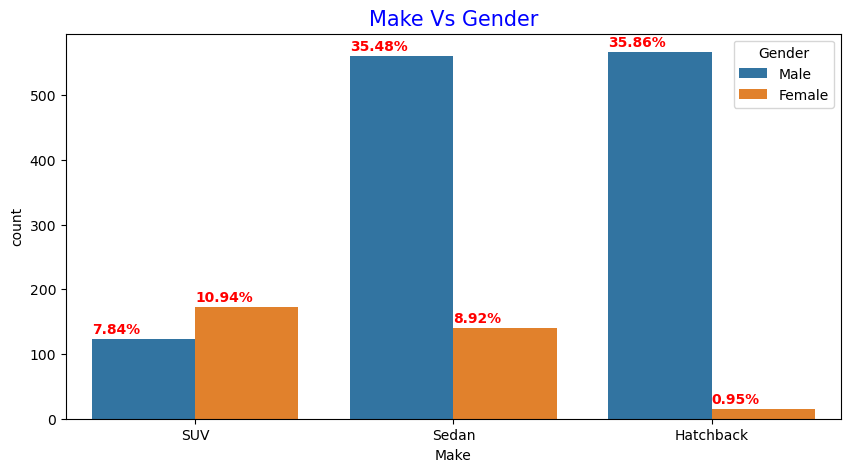

In [373]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Make",hue="Gender")
axes.set_title("Make Vs Gender",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

In [374]:
df["Gender"].value_counts(normalize=True)

Male      0.791904
Female    0.208096
Name: Gender, dtype: float64

#### Only 20% of our customer base is Female. We can say that men prefer car more than women.
#### Female prefer SUV than Men in the SUV segment. The females are the potential buyers for SUV.

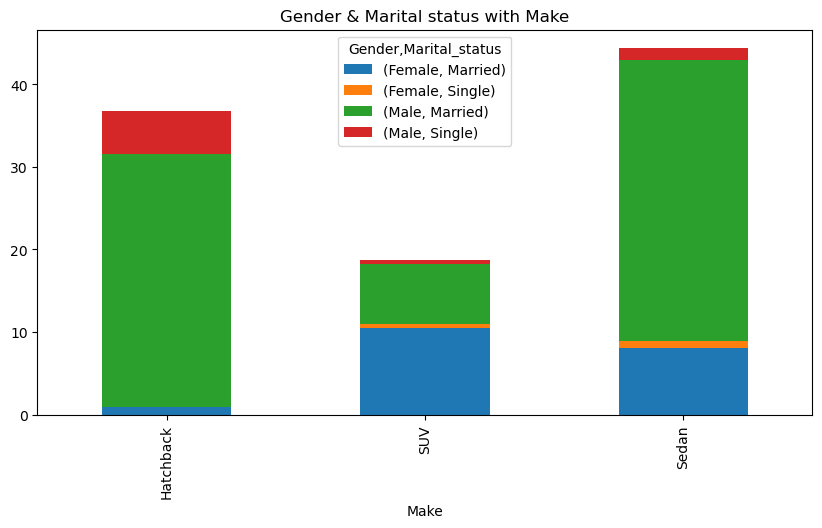

In [375]:
x=round(pd.pivot_table(df,index="Make",columns=["Gender","Marital_status"],values="Price",aggfunc=np.size)/len(df)*100,2).fillna(0)
x.plot(kind="bar",stacked=True,figsize=(10,5),title="Gender & Marital status with Make");

In [376]:
round(pd.pivot_table(df,index="Make",columns=["Marital_status","Gender"],values="Price",aggfunc=np.size)/len(df)*100,2)

Marital_status Married        Single      
Gender          Female   Male Female  Male
Make                                      
Hatchback         0.89  30.61   0.06  5.25
SUV              10.50   7.27   0.44  0.57
Sedan             8.03  33.97   0.89  1.52

#### we have seen female prefer SUV but with marital status, single male prefers SUV more than single female.
#### Single female prefers Sedan.

### The potential buyers that the marketing team can devise targeted marketing are:
#### Married Men and Married Female.
#### In that, Married female prefers SUV and Married Male Prefers both sedan and Hatchback.
#### Single Male prefers hatchback.